In [2]:
from cogent3 import DNA
from cogent3.core.annotation import Feature
example_seq = DNA.make_seq("CGAAACGTTTAGAGTGGGGG", name="seq1")

In [1]:
genbank_path = "/Users/kiratalreja/Downloads/NC_000913.3.gb"


KeyboardInterrupt: 

In [ ]:
from cogent3.parse.genbank import Min

In [5]:
example_seq.add_feature("CDS","ID4839",[(3,10)])

CDS "ID4839" at [3:10]/20

In [6]:
example_seq.annotations

[CDS "ID4839" at [3:10]/20]

In [8]:
example_seq.get_annotations_matching(annotation_type="CDS")

[CDS "ID4839" at [3:10]/20]

In [9]:
from cogent3.parse.genbank import MinimalGenbankParser
from cogent3 import open_
path = "/Users/kiratalreja/Downloads/NC_000913.3.gb"
with open_(path) as infile:
    data = list(MinimalGenbankParser(infile.readlines()))


{'type': 'source',
 'raw_location': ['1..4641652'],
 'location': [<cogent3.parse.genbank.Location at 0x7febc97569e0>],
 'organism': ['Escherichia coli str. K-12 substr. MG1655'],
 'mol_type': ['genomic DNA'],
 'strain': ['K-12'],
 'sub_strain': ['MG1655'],
 'db_xref': ['taxon:511145']}

In [17]:
from cogent3.parse.gff import gff_parser
gff_path = "/Users/kiratalreja/Downloads/prok_NoLocusTags.gff"
features = list(gff_parser(gff_path))


In [19]:
features[0]

{'SeqID': 'sequence001',
 'Source': 'mine',
 'Type': 'gene',
 'Start': 189,
 'End': 255,
 'Score': '.',
 'Strand': '+',
 'Phase': '.',
 'Attributes': {'ID': 'gene0',
  'Dbxref': 'ASAP:ABE-0000006',
  'gene': 'thrL',
  'gene_synonym': 'ECK0001'},
 'Comments': None}

In [20]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation


In [27]:
seq = SeqRecord(Seq("CGAAACGTTTAGAGTGGGGG"),
                 id="SampleID", name="sequence001",
                 description="SampleRecord")

seq.features.append(SeqFeature(FeatureLocation(3,10), type="CDS"))
seq.features

[SeqFeature(FeatureLocation(ExactPosition(3), ExactPosition(10)), type='CDS')]

In [31]:
from BCBio import GFF

in_file = "/Users/kiratalreja/Downloads/prok_NoLocusTags.gff"

limit_info = dict(gff_type=["CDS"])

in_handle = open(in_file)
for rec in GFF.parse(in_handle, limit_info=limit_info):
    print(rec.features)
in_handle.close()

[SeqFeature(FeatureLocation(ExactPosition(189), ExactPosition(255), strand=1), type='CDS', id='CDS0'), SeqFeature(FeatureLocation(ExactPosition(336), ExactPosition(2799), strand=1), type='CDS', id='CDS1'), SeqFeature(FeatureLocation(ExactPosition(2800), ExactPosition(3733), strand=1), type='CDS', id='CDS2'), SeqFeature(FeatureLocation(ExactPosition(3733), ExactPosition(5020), strand=1), type='CDS', id='CDS3'), SeqFeature(FeatureLocation(ExactPosition(6089), ExactPosition(6459), strand=-1), type='inferred_parent', id='gene4'), SeqFeature(FeatureLocation(ExactPosition(6528), ExactPosition(7959), strand=-1), type='CDS', id='CDS5')]


In [34]:
from skbio import Sequence
from skbio.metadata import IntervalMetadata

interval_metadata = IntervalMetadata(4)
interval = interval_metadata.add([(1, 3)], metadata={'gene': 'sagA'})
seq = Sequence('CGAAACGTTTAGAGTGGGGG', interval_metadata=interval_metadata)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [7]:
from cogent3 import load_unaligned_seqs
from cogent3.parse.gff import gff_parser

def fix_gff(gff):
    return [r for r in gff if r["Attributes"]["ID"]]

fasta_path = "/Users/kiratalreja/Downloads/Homo_sapiens.GRCh38.dna.chromosome.1.fa"
gff3_path = "/Users/kiratalreja/Downloads/Homo_sapiens.GRCh38.108.chromosome.1.gff3"

gff = list(gff_parser(gff3_path))
gff = fix_gff(gff)


seqs = load_unaligned_seqs(fasta_path, moltype="dna")

seq = seqs.seqs[0]
seq.name = "1"

seq.annotate_from_gff(gff, pre_parsed=True)




In [8]:
import gc
#seq = seq[45:50]
print(len(gc.get_objects()))

2235995


In [1]:
from cogent3 import load_unaligned_seqs
from cogent3.parse.gff import gff_parser
fasta_path = "/Users/kiratalreja/Downloads/Homo_sapiens.GRCh38.dna.chromosome.1.fa"
seqs = load_unaligned_seqs(fasta_path, moltype="dna")
seq = seqs.seqs[0]
seq.name = "1"
seq = seq[45:50]

In [2]:
import gc
print(len(gc.get_objects()))

245034


In [12]:
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


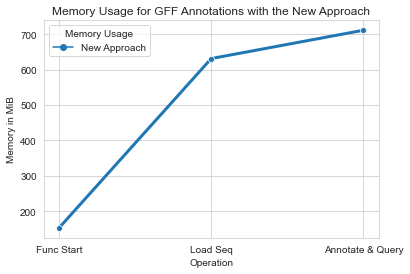

In [13]:
data = {'New Approach':[152.5,631.7,711.8]}
df = pd.DataFrame(data)
fig, ax = plt.subplots() 
m = sns.lineplot(df,ax=ax,markers=True,linewidth = 3)
ax.set_xticks(range(0,3));
plt.legend(title='Memory Usage');  
m.set_xticklabels(['Func Start','Load Seq','Annotate & Query'])
ax.set(xlabel='Operation', ylabel='Memory in MiB')
ax.set_title('Memory Usage for GFF Annotations with the New Approach');
plt.savefig("Memory-NewApproach.svg", format="svg")


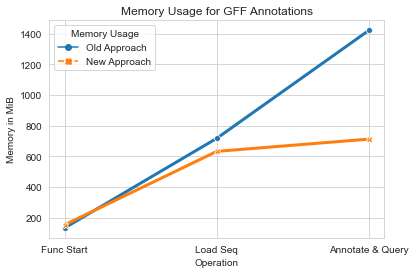

In [24]:
old_data = {'Old Approach':[132.1,717.2,1422.2],'New Approach':[152.5,631.7,711.8]}

old_df = pd.DataFrame(old_data)

fig, ax = plt.subplots()
m = sns.lineplot(old_df,ax=ax,markers=True,linewidth = 3)

ax.set_xticks(range(0,3));
plt.legend(title='Memory Usage');  
m.set_xticklabels(['Func Start','Load Seq','Annotate & Query'])
ax.set(xlabel='Operation', ylabel='Memory in MiB')
ax.set_title('Memory Usage for GFF Annotations');
ax.lines[1].set_linestyle("-")
plt.savefig("Memory-Comparison.svg", format="svg")


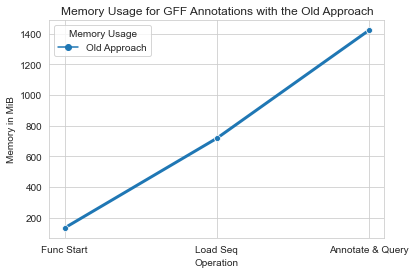

In [23]:
data = {'Old Approach':[132.1,717.2,1422.2]}
df = pd.DataFrame(data)
fig, ax = plt.subplots()
m = sns.lineplot(df,ax=ax,markers=True,linewidth = 3)
ax.set_xticks(range(0,3));
plt.legend(title='Memory Usage');  
m.set_xticklabels(['Func Start','Load Seq','Annotate & Query'])
ax.set(xlabel='Operation', ylabel='Memory in MiB')
ax.set_title('Memory Usage for GFF Annotations with the Old Approach');
plt.savefig("Memory-OldApproach.svg", format="svg")

ValueError: Cannot use `hue` without `x` and `y`

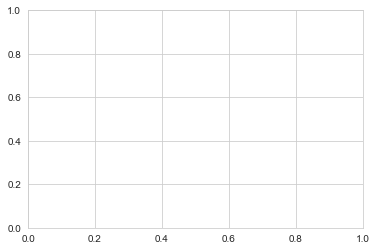

In [44]:
data = {'Load Seq':[8.8,9.0],'Annotate & Query': [201.1,5.1],'Approach':['Old','New']}
df = pd.DataFrame(data)
fig, ax = plt.subplots()
m = sns.barplot(df,ax=ax,linewidth = 3,hue='Approach')
ax.set_xticks(range(0,2));
#plt.legend(title='Memory Usage');  
#m.set_xticklabels(['Load Seq','Annotate & Query'])
ax.set(xlabel='Operation', ylabel='Memory in MiB')
ax.set_title('Memory Usage for GFF Annotations with the Old Approach');
plt.savefig("Time-OldApproach.svg", format="svg")

In [39]:
penguins = sns.load_dataset("penguins")

In [40]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [45]:
df

,Load Seq,Annotate & Query,Approach
0,8.8,201.1,Old
1,9.0,5.1,New


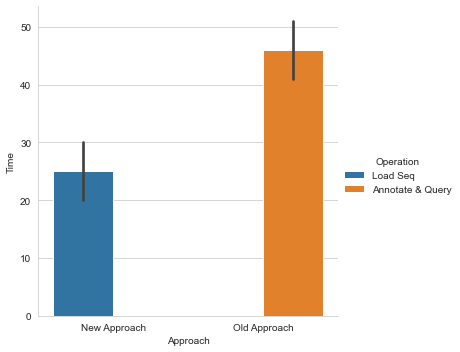

In [59]:
data = {'Approach':["New Approach","New Approach","Old Approach","Old Approach"],"Operation":["Load Seq","Load Seq","Annotate & Query","Annotate & Query"],"Time":[20,30,41,51]}
df = pd.DataFrame(data)
sns.catplot(df,x='Approach',y='Time',hue="Operation",kind='bar')


In [48]:
df

,Load Seq,Annotate & Query
0,9.0,5.1


In [ ]:
old_data = {'Old Approach':[132.1,717.2,1422.2],'New Approach':[152.5,631.7,711.8]}

old_df = pd.DataFrame(old_data)

fig, ax = plt.subplots()
m = sns.lineplot(old_df,ax=ax,markers=True,linewidth = 3)

ax.set_xticks(range(0,3));
plt.legend(title='Memory Usage');  
m.set_xticklabels(['Func Start','Load Seq','Annotate & Query'])
ax.set(xlabel='Operation', ylabel='Memory in MiB')
ax.set_title('Memory Usage for GFF Annotations');
ax.lines[1].set_linestyle("-")
plt.savefig("Memory-Comparison.svg", format="svg")